# Aprendizagem Automática Avançada
## TP6 - HMM exercises
João Romão - 55760,
Pedro França - 55848

In [1]:
import numpy as np
from hmmlearn import hmm
import pickle
import pandas as pd
import matplotlib.pyplot as plt

## 0. Some aspects of HMMs and the hmmlearn library

### 0.1. Hidden Markov Models (HMMs)

A Hidden Markov Model is generative probabilistic model that assumes the Marvok property (that is, it assumes that future states depend only on the current state and not on states that occurred previously). However, in HMMs the underlying states (Z) are hidden, and it is only possible to know the observations (X) generated because of these states. In other words, states cannot be observed directly, but their resulting observations can. 

The transitions between hidden states are assumed to have the form of a (first-order) Markov chain. They can be specified by the __start probability vector π__ and a __transition probability matrix A__. The __emission probability__ of an observable can be any distribution with parameters __θ__ conditioned on the current hidden state. The HMM is completely determined by π, A and θ.

Therefore, by assessing a set of __X__ observations, we can infer which is the most likely sequence of __Z__ hidden states, based on π, A, and θ.

### 0.2. Available models

The hmmlearn library has 3 different HMMs available:

* hmm.GaussianHMM - Hidden Markov Model with Gaussian emissions.

* hmm.GMMHMM - Hidden Markov Model with Gaussian mixture emissions.

* hmm.MultinomialHMM -Hidden Markov Model with multinomial (discrete) emissions.

The first as last HMMs will be used in exercise 1 and 2, respectively.

## 1. Exercise 1 - HMM illustrated

On this first exercise we are running the example in the [hmmlearn tutorial](https://hmmlearn.readthedocs.io/en/latest/tutorial.html) and analysing the steps and results.

### 1.1 Building HMM and generating samples

We will be building a GaussinHMMM and passing all necessary parameters to define it. In these models the observation probability distribution is the normal distribution, meaning the emission probabilities need to be defined using the mean and covariance. According to the parameters defined in the tutorial we can observe that the model we will be building has:
- three states
- starting probabilities of 0.6, 0.3, and 0.1
- transference probabilities are defined by the matrix (model.transmat\_)
- emission probabilities follow a normal distribution defined by the means and covariances

We can also generate samples from the model, returning a sequence of corresponding observed values and hidden state sequence.

In [2]:
np.random.seed(42)

# building the GaussianHMM with the parameters
model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))

# generating 100 samples from the model
X, Z = model.sample(100)

In [3]:
#Sample observations
print("Observations")
print(X)

Observations
[[-1.11188012e+00  3.18902185e-01]
 [ 1.57921282e+00  7.67434729e-01]
 [-5.80878134e-01 -5.25169807e-01]
 [ 2.41962272e-01 -1.91328024e+00]
 [ 8.16445081e-01 -1.52387600e+00]
 [-9.08024076e-01 -1.41230370e+00]
 [-6.29474961e-01  5.97720467e-01]
 [-5.44382725e-01  1.10922590e-01]
 [-6.00253850e-01  9.47439821e-01]
 [-6.01706612e-01  1.85227818e+00]
 [-5.33648804e-01 -5.52786232e-03]
 [ 5.82254491e+00  8.77915635e+00]
 [ 5.77831304e+00 -1.80636028e+00]
 [ 7.38466580e-01  1.71368281e-01]
 [-1.00908534e+00 -1.58329421e+00]
 [-4.60638771e-01  1.05712223e+00]
 [-1.13055230e+00  1.34428883e-01]
 [ 2.32307800e+00 -2.38832371e+00]
 [ 5.82122795e-01  8.87748460e-01]
 [ 2.16078248e+00 -3.30921238e+00]
 [ 3.49184671e+00  1.10996470e+01]
 [-1.10633497e+00 -1.19620662e+00]
 [ 3.83479542e+00 -2.70343862e+00]
 [ 3.36163603e+00 -3.64511975e+00]
 [ 4.49543425e+00 -2.66181875e+00]
 [ 3.80254896e-01 -2.17809750e+00]
 [-1.41875046e+00  1.04249162e+00]
 [-2.19671888e-01  3.57112572e-01]
 [-7.89

In [4]:
#Sample hidden states
print("Hidden states")
print(Z)

Hidden states
[0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 1 2 0 1 1 1 1 0 0 0 0 2 2 2 2 0 1 1
 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 1 2 2 0 0 0 1 1 1 1 2 2 1 1 2 2 2 1
 1 2 2 2 2 2 2 2 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


### 1.2 Plotting the samples

We can also plot the sampled observation by following the [plot instructions](https://hmmlearn.readthedocs.io/en/latest/auto_examples/plot_hmm_sampling.html#sphx-glr-auto-examples-plot-hmm-sampling-py) in the tutorial. We used the 100 samples generated previously and plotted them in a 2D graph, together with the three components. The transitions between states are represented with the lines connecting the observations, although it is hard to decipher how these are transitioning, since the resulting plot is very busy. Nonetheless, we can observe that component 1 appears to have a greater number of "internal connections" meaning this state has a great likelihood of transitioning to itself, as denoted in the corresponding probability in the transaction matrix (0.7).

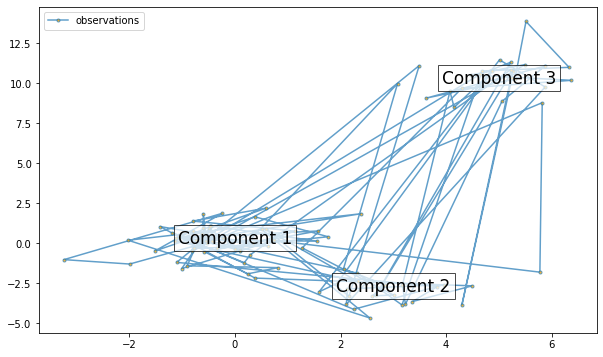

In [5]:
# Plot the sampled data
plt.figure(figsize=(10,6))

plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(model.means_):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

### 1.3 Fixing parameters

Parameters of HMM can be set explicitly, such as we did in 1.1 where we built the model and defined all its parameters. However, the algorithm can also compute these values, but we need to pass the missing parameters into `init_params`, which takes a string with a representation of the parameters that were not explicitly defined. For example, if we wish to define a GaussianHMM without explicitly defining the means, covariances, and starting probabilities we need to pass their strings codes as 'mcs'. If the transition matrix was not explicitly defined, the 't' string code should be passed into `init_params`.

In [6]:
model = hmm.GaussianHMM(n_components=3, n_iter=100, init_params="mcs")
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])

Since we have 3 states (0, 1, 2), we can explicitly define the transition matrix to inhibit transitions between certain states (corresponding to the zeros in the *transmat*). Likewise, we can also define the start probabilities to force a certain state to be the first, by passing '1' as its correspondent probability. In the cell bellow, the first state will always be 'component 0'.

In [7]:
lr = hmm.GaussianHMM(n_components=3, covariance_type="diag", init_params="cm", params="cmt")

lr.startprob_ = np.array([1.0, 0.0, 0.0])
lr.transmat_ = np.array([[0.5, 0.5, 0.0],
                         [0.0, 0.5, 0.5],
                         [0.0, 0.0, 1.0]])

### 1.4 Training HMM parameters and inferring the hidden states

It is also possible to train an HMM by fitting it to a sequence of observations. In this case, the missing parameters of the model will be estimated and can be accessed by calling the respective methods.

In [8]:
# fitting a model that is not completely defined
remodel = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
remodel.fit(X)

# retrieving the most-likely state sequence
Z2 = remodel.predict(X)

# printing the estimated parameters
print('Estimated start probabilities')
print(remodel.startprob_)
print("")
print('Estimated transition matrix')
print(remodel.transmat_)
print("")
print('Estimated means')
print(remodel.means_)
print("")
print('Estimated covariances')
print(remodel.covars_)

Estimated start probabilities
[1.00000000e+000 2.48941256e-183 3.53281766e-055]

Estimated transition matrix
[[0.82609568 0.05807072 0.1158336 ]
 [0.16631341 0.58333333 0.25035326]
 [0.21501841 0.300616   0.48436559]]

Estimated means
[[-0.24426782  0.12768295]
 [ 4.9594706  10.41581473]
 [ 2.91854222 -3.03503021]]

Estimated covariances
[[[1.02740432 0.20512672]
  [0.20512672 0.96324689]]

 [[0.71350998 0.24714943]
  [0.24714943 1.20133896]]

 [[1.013082   0.0738489 ]
  [0.0738489  0.59217614]]]


As observed, the estimated start probabilities, transition matrix, means, and covariance are not the same as those defined in 1.1. This was expected since the new model must estimate all the parameters. Nonetheless, the estimated transition matrix, estimated means, and estimated covariance are actually very close to those previously defined, although the second and third states are switched regarding their previous order. The start probabilities present the most differences from those of 1.1, with the first component having very close to 100% probability of being the first state.

We can also access a prediction of the most-likely hidden state sequence by using .predict(), as well inspect the log-probability of X using .score(), passing the matrix of observations X in both cases.

In [9]:
print("Model score: " + str(remodel.score(X)) + "\n")
print('Most-likely state sequence')
print(Z2)

Model score: -349.6405229127373

Most-likely state sequence
[0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 2 0 2 1 0 2 2 2 0 0 0 0 0 1 1 1 1 0 2 2
 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 2 1 1 0 0 0 2 2 2 2 1 1 2 2 1 1 1 2
 2 1 1 1 1 1 1 1 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]


We can see that the log-probability score is extremely small. However, we need to consider that we are calculating the likelihood of a sequence of 100 observations (implying the product of 100 conditional probabilities), so the global probability of this scenario should be expected to be very small. From this we can infer that by decreasing the number of observations the model would have a higher score:

In [10]:
X = X[0:10]

print("Model score for 10 observations: " + str(remodel.score(X)) + "\n")
print('Most-likely state sequence')
print(remodel.predict(X))

Model score for 10 observations: -31.051041832803936

Most-likely state sequence
[0 0 0 0 0 0 0 0 0 0]


### 1.5 Monitoring convergence

We can use _remodel.monitor_ _ to monitor the trained model and use _monitor_.converged_ to confirm whether the model has converged or not. In this case, we can see that converge was achieved in the model trained in the previous subsection. We can also see the number of iterations it took to converge ny inspecting `iter`. Moreover, we can confirm that the last score obtained in `history` is the same score we showed previously for the 100 samples.

In [11]:
# assessing convergence
print ("Monitoring convergency:\n\n ", remodel.monitor_)
print ("\n\nModel converged:",remodel.monitor_.converged)

Monitoring convergency:

  ConvergenceMonitor(
    history=[-520.3118484058581, -418.10841794385755, -359.3321480988338, -351.7436882256872, -350.76286232157804, -350.041497727218, -349.7332588334996, -349.66142733454757, -349.64486703519503, -349.64125529326515],
    iter=10,
    n_iter=1000,
    tol=0.01,
    verbose=False,
)


Model converged: True


### 1.6 Working with multiple sequences

When using two sequences of observations that we wish to pass as an input to fit a model and to predict the most-likely hidden states, we first need to concatenate them and compute an array of sequence lengths.

In [12]:
X1 = [[0.5], [1.0], [-1.0], [0.42], [0.24]]
X2 = [[2.4], [4.2], [0.5], [-0.24]]

In [13]:
#concatenating the arrays of observations
X = np.concatenate([X1, X2])

#array of sequence lengths
lengths = [len(X1), len(X2)]

In [14]:
newmodel = hmm.GaussianHMM(n_components=3).fit(X, lengths)
newmodel

Fitting a model with 14 free scalar parameters with only 9 data points will result in a degenerate solution.


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=3, n_iter=10, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [15]:
newmodel.predict(X,lengths)

array([0, 2, 2, 0, 2, 1, 1, 0, 2])

### 1.7 Saving and loading HMM

Finally, after we train a model we can save the HMM for future use using the pickle module, as shown in the cell bellow:

In [16]:
with open("filename.pkl", "wb") as file: pickle.dump(remodel, file)
with open("filename.pkl", "rb") as file: pickle.load(file)

## 2. Exercise 2 - Dishonest casino problem

To solve this exercise we will use the **MultinomialHMM** model and set up the **starting probability**, **transition matrix** and **emission probabilities** given by [slide 23](https://moodle.ciencias.ulisboa.pt/pluginfile.php/332825/mod_resource/content/7/markov.pdf).

For part a) of this exercise we will assume all parameters are known and, therefore, define them explicitly. However, in the following parts we will be assuming one or more parameters are unknown and will be estimated using the .fit() method with our array of observations (X), which we also took from the slides. In these cases, we will fit the model 10 different times to generate estimates of the unknown parameters and present the results for the model that had the highest score. To randomly initialize the unknown parameters, we need to pass their respective string code into `init_params`. Furthermore, we need to define which parameters we wish to update along the different iterations of the fit by also passing their string code into `params`, otherwise this will default to "all parameters" ("ste" in this case). This would cause all parameters to update along the iterations as well, using the parameters we define initially as the starting points.

We will be displaying the score, most-likely state sequence, as well as estimated probabilities for each part of the exercise.

In [17]:
# array of observations based on slide 23
X = np.array([5, 5, 3, 0, 4, 2, 1, 0, 5, 0, 5, 1, 0, 0, 4, 1, 2, 3, 5, 4, 2, 1, 0, 3, 2, 4, 5, 5, 2, 3, 1, 5, 0,
              5, 4, 4, 1, 2, 3, 1, 2, 1, 2, 0, 4, 0, 3, 1, 3, 5, 3, 0, 4, 5, 5, 5, 2, 1, 3, 5]).reshape(-1, 1)

### a) Construct the model assuming all parameters known

In [18]:
model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = np.array([(2/3), (1/3)])
model.transmat_ = np.array([[0.95, 0.05],
                            [0.1, 0.9]])

model.emissionprob_ = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
                                 [1/10, 1/10, 1/10, 1/10, 1/10, 5/10]])

print('Model score: ' + str(model.score(X)) + "\n")
print('Most-likely state sequence')
print(model.predict(X))

Model score: -107.09587125905627

Most-likely state sequence
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


We can see that the most-likely state sequence is composed of only zeros (corresponding to the Fair die, according to our parameterization). This is a divergence from the slide results, which display alternating states of Fair and Loaded dice (0 and 1, respectively) in larger group with the same state. By inspecting the transition matrix alone, we would expect a model transition from 0 to 1 to occur with a 0.05 probability, should the emission probabilities be disregarded. However, the model estimates the most-likely sequence of states based on the observations to which it is fitted, meaning this sequence is the one that has the highest likelihood of emitting the observations in X.

### b) Train the model assuming the transition probability matrix is unknown

In [19]:
max_score = float('-inf') #defining a very low score to start

#fitting the model 10 times and displaying the results for the one with the highest score
for i in range(10):
    model = hmm.MultinomialHMM(n_components=2, init_params="t", params = "t", n_iter=10000, tol=0.001)
    model.startprob_ = np.array([(2/3), (1/3)])
    model.emissionprob_ = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
                                 [1/10, 1/10, 1/10, 1/10, 1/10, 5/10]])
    model.fit(X)
    score = model.score(X)
    
    if model.monitor_.converged:
        if score > max_score:
            max_score = score
            Z = model.predict(X)
            transmat = model.transmat_

print('Model score: ' + str(max_score) + "\n")
print('Most-likely state sequence')
print(Z)
print("")
print('Estimated transition matrix')
print(transmat)

Model score: -106.22451383708366

Most-likely state sequence
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Estimated transition matrix
[[0.89274811 0.10725189]
 [0.56619456 0.43380544]]


This time the model needed to estimate the transition matrix based on the X observations. We see that now these probabilities changed from those shown in a), altough the state '0' still has a high probability of transitioning back to itself, while this probility highly decreased for sate '1', which is now more likely to transition to state '0'. We also see that the most-likely state sequence is very close to the one we obtained in a), despite the differences in the estimated transition matrix.

### c) train the model assuming the emission probability matrix is unknown.

In [20]:
max_score = float('-inf') #defining a very low score to start

#fitting the model 10 times and displaying the results for the one with the highest score
for i in range(10):
    model = hmm.MultinomialHMM(n_components=2, init_params="e", params ="e", n_iter=10000, tol=0.001)
    model.startprob_ = np.array([(2/3), (1/3)])
    model.transmat_ = np.array([[0.95, 0.05],
                                [0.1, 0.9]])
    model.fit(X)
    score = model.score(X)
    if model.monitor_.converged:
        if score > max_score:
            max_score = score
            Z = model.predict(X)
            emission = model.emissionprob_

print('Model score: ' + str(max_score) + "\n")
print('Most-likely state sequence')
print(Z)
print("")
print('Estimated emission probabilities')
print(emission)

Model score: -106.47857685300349

Most-likely state sequence
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Estimated emission probabilities
[[0.16293934 0.15774316 0.14179289 0.15363352 0.12958657 0.25430452]
 [0.17366371 0.18341815 0.16540663 0.14317904 0.14036687 0.1939656 ]]


In this exercise we needed to predict the emission probabilities of both dice, both approaching a "fair" die scenario. Nonetheless, both dice are slightly loaded in the sense that they have a higher probability of emitting the number 6 (or 5, in the np.array), which is likely the result of the higher number of '6' in the observations. The model appears to have distributed this higher likelihood across both dice instead of having only one of them loaded. Nonetheless, the most-likely state sequence is exactly the same as in a), only displaying the zero state.

### d) train the model assuming both transition and emission matrices are unkonwn

In [21]:
max_score = float('-inf') #defining a very low score to start

#fitting the model 10 times and displaying the results for the one with the highest score
for i in range(10):
    model = hmm.MultinomialHMM(n_components=2, init_params="et", params = "et", n_iter=10000, tol=0.001)
    model.startprob_ = np.array([(2/3), (1/3)])

    model.fit(X)
    score = model.score(X)
    
    if model.monitor_.converged:
        if score > max_score:
            max_score = score
            Z = model.predict(X)
            transmat = model.transmat_
            emission = model.emissionprob_

print('Model score: ' + str(max_score) + "\n")
print('Most-likely state sequence')
print(Z)
print("")
print('Estimated transition matrix')
print(transmat)
print("")
print('Estimated emission probabilities')
print(emission)

Model score: -98.7166603090719

Most-likely state sequence
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]

Estimated transition matrix
[[1.22856654e-04 9.99877143e-01]
 [9.14600135e-01 8.53998652e-02]]

Estimated emission probabilities
[[3.34449950e-02 8.45362631e-02 1.01920662e-01 3.13742172e-01
  2.38204859e-01 2.28151049e-01]
 [2.88707620e-01 2.41904221e-01 1.94044247e-01 1.74362375e-12
  3.72632212e-02 2.38080691e-01]]


However, when we need to estimate both the transition matrix and emission probabilities, we see that the model now diverges greatly from the corresponding parametrization in a). This was expected since now we have fewer known parameters, which also results in a most-likely state sequence that highly diverges from the one predicted in a).

### e) train the model assuming all the parameters unknown, including the number of states

**1 state**

In [22]:
max_score = float('-inf') #defining a very low score to start

#fitting the model 10 times and displaying the results for the one with the highest score
for i in range(10):
    model = hmm.MultinomialHMM(n_components=1, init_params="est", params ="est", n_iter=10000, tol=0.001)
    model.fit(X)
    
    score = model.score(X)
    
    if model.monitor_.converged:
        if score > max_score:
            max_score = score
            Z = model.predict(X)
            start = model.startprob_
            transmat = model.transmat_
            emission = model.emissionprob_

print('Model score: ' + str(max_score) + "\n")
print('Most-likely state sequence')
print(Z)
print("")
print('Estimated start probabilities')
print(start)
print("")
print('Estimated transition matrix')
print(transmat)
print("")
print('Estimated emission probabilities')
print(emission)

Model score: -106.47659453334079

Most-likely state sequence
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Estimated start probabilities
[1.]

Estimated transition matrix
[[1.]]

Estimated emission probabilities
[[0.16666667 0.16666667 0.15       0.15       0.13333333 0.23333333]]


Since now only one state is being used in the model, the most-likely state sequence will be composed of only that state, which also has a start probability of 1. However, we can see that the emission probability of the number '6' is higher than the probabilities for each of the other numbers, reflecting the biased observations which have a higher frequency of the number '6' when compared to each of the other ones. Since we only have 1 state, we cannot make further comparisons with the parameters in a).

**2 states**

In [23]:
max_score = float('-inf') #defining a very low score to start

#fitting the model 10 times and displaying the results for the one with the highest score
for i in range(10):
    model = hmm.MultinomialHMM(n_components=2, init_params="est", params = "est", n_iter=10000, tol=0.001)
    model.fit(X)
    
    score = model.score(X)
    if model.monitor_.converged:
        if score > max_score:
            max_score = score
            Z = model.predict(X)
            start = model.startprob_
            transmat = model.transmat_
            emission = model.emissionprob_

print('Model score: ' + str(max_score) + "\n")
print('Most-likely state sequence')
print(Z)
print("")
print('Estimated start probabilities')
print(start)
print("")
print('Estimated transition matrix')
print(transmat)
print("")
print('Estimated emission probabilities')
print(emission)

Model score: -99.78525156155565

Most-likely state sequence
[0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1]

Estimated start probabilities
[1.00000000e+00 1.56268625e-29]

Estimated transition matrix
[[8.92953031e-05 9.99910705e-01]
 [6.97133003e-01 3.02866997e-01]]

Estimated emission probabilities
[[1.65415671e-03 1.39349401e-01 1.41222087e-17 3.62522069e-01
  2.67440195e-01 2.29034179e-01]
 [2.83133990e-01 1.85947440e-01 2.55871358e-01 4.70077916e-26
  3.86794964e-02 2.36367716e-01]]


With 2 states, we can see that there is a high divergence of the values of all parameters when compared to those in a). This is a similar scenario to what was observed in d), when two parameters were unknown, but now all three parameters need to be estimated. As a result, the most-likely state sequence also differs greatly from the one predicted in a). We can also see that the score improved from the previous scenario, when only one state was being used. 

Next, we will do similar fits with 3 and 4 states:

**3 states**

In [24]:
max_score = float('-inf') #defining a very low score to start

#fitting the model 10 times and displaying the results for the one with the highest score
for i in range(10):
    model = hmm.MultinomialHMM(n_components=3, init_params="est", params ="est", n_iter=10000, tol=0.001)
    model.fit(X)
    
    score = model.score(X)
    
    if model.monitor_.converged:
        if score > max_score:
            max_score = score
            Z = model.predict(X)
            start = model.startprob_
            transmat = model.transmat_
            emission = model.emissionprob_

print('Model score: ' + str(max_score) + "\n")
print('Most-likely state sequence')
print(Z)
print("")
print('Estimated start probabilities')
print(start)
print("")
print('Estimated transition matrix')
print(transmat)
print("")
print('Estimated emission probabilities')
print(emission)

Model score: -95.11939260258191

Most-likely state sequence
[2 0 1 0 1 0 2 0 1 0 1 2 0 0 1 2 0 1 0 1 0 2 0 1 0 1 0 1 0 1 2 1 0 1 0 1 2
 0 1 2 0 2 0 0 1 0 1 2 1 0 1 0 1 2 0 1 0 2 1 2]

Estimated start probabilities
[2.09634252e-36 5.72588387e-29 1.00000000e+00]

Estimated transition matrix
[[1.24066835e-01 6.50756939e-01 2.25176226e-01]
 [5.96234395e-01 3.54636336e-16 4.03765605e-01]
 [7.50970012e-01 2.49015795e-01 1.41932831e-05]]

Estimated emission probabilities
[[3.91523999e-01 6.36506301e-05 3.52372462e-01 3.65823136e-17
  4.30948009e-02 2.12945087e-01]
 [1.23399130e-06 1.23094573e-07 1.69207402e-13 4.54137150e-01
  3.48136945e-01 1.97724548e-01]
 [2.02788767e-09 6.82900275e-01 7.58174399e-24 1.64620826e-12
  1.74607450e-09 3.17099721e-01]]


**4 states**

In [25]:
max_score = float('-inf') #defining a very low score to start

#fitting the model 10 times and displaying the results for the one with the highest score
for i in range(10):
    model = hmm.MultinomialHMM(n_components=4, init_params="est", params ="est", n_iter=10000, tol=0.001)
    model.fit(X)
    
    score = model.score(X)
    
    if model.monitor_.converged:
        if score > max_score:
            max_score = score
            Z = model.predict(X)
            start = model.startprob_
            transmat = model.transmat_
            emission = model.emissionprob_

print('Model score: ' + str(max_score) + "\n")
print('Most-likely state sequence')
print(Z)
print("")
print('Estimated start probabilities')
print(start)
print("")
print('Estimated transition matrix')
print(transmat)
print("")
print('Estimated emission probabilities')
print(emission)

Model score: -89.86192657636208

Most-likely state sequence
[2 0 3 0 2 1 3 0 2 0 2 1 3 0 2 1 1 3 0 2 1 3 0 3 0 2 0 2 1 3 0 2 0 2 2 2 1
 1 3 1 1 1 1 0 2 0 3 1 3 0 3 0 2 2 0 2 1 1 3 0]

Estimated start probabilities
[3.74943218e-194 0.00000000e+000 1.00000000e+000 1.30884814e-124]

Estimated transition matrix
[[1.54594372e-10 3.73268691e-30 7.08332252e-01 2.91667748e-01]
 [1.18223409e-01 4.29530060e-01 7.51396162e-24 4.52246531e-01]
 [3.57973821e-01 4.13641839e-01 2.28384340e-01 6.85146748e-28]
 [8.49288708e-01 1.50711292e-01 8.94123106e-20 3.91454840e-47]]

Estimated emission probabilities
[[5.16715956e-01 8.54942769e-02 6.97880299e-02 5.10071786e-62
  1.88490612e-09 3.28001735e-01]
 [2.43547603e-08 4.75747843e-01 5.24252132e-01 2.62362763e-30
  3.75328800e-21 2.24909761e-10]
 [6.28525526e-24 3.01399549e-39 1.88550550e-21 1.79136997e-12
  4.90382466e-01 5.09617534e-01]
 [9.01026835e-02 1.26070992e-01 1.26104009e-05 7.83430861e-01
  3.82126029e-04 7.27371458e-07]]


As we can see, by increasing the number of states the scored improved, as more states with different starting and emission probabilities were being added. In all cases of this part of the exercise, we can see that there was always one state with a start probability close to 1 (in the first fit it was exactly 1, but this was due to the model only having one state). The transition matrices also present states with very low transition probability (close to 0) implying that the transition between those states is highly unlikely, while favoring other transitions. Like what we discussed in the first fit of this part of the exercise, no comparisons can be made between these models and a), as they have a different number of states and, therefore, their parameters cannot be directly compared.

### 2.2 Conclusion

Overall, we observed that when fitting the model with either the transition matrix and emission probabilities unknown, the model was able to produce estimates that were very similar to the parameters defined in a) or, at least, displayed an equivalent or very similar sequence of states. However, when both these parameters were unknown, the model became less robust and the estimates started to diverge more from the parameters in a), also leading to a most-likely predicted state that was very different. When all parameters were unknown, for the same number of states (second exercise of e)), robustness of the model decreased further, with parameter estimates and most-likely state sequence diverging even more from the parameters of a). By having more samples from a), it is possible that these parameter estimates would be closer to the a) parameters, but they would still diverge significantly if two or more parameter were unknown. 

When all parameters were unknown (e)) and the number of states varied, we observed that the model assigned a starting probability very close to 1 to one of the sates (or exactly 1 when only one state was defined). As the number of states increased, so did the score, as we observe that each of the states becomes more biased towards some emissions (observed numbers), while having probabilities close to 0 for other emissions. In theory, this implies that certain states are most likely to produce a specific observation than other ones, which may increase the conditional probability of that observation for that given state (as an extreme example, if a die only returned the number 6 and all other dice almost never returned this number, the probability of a '6' observation having originated from that die would be very high). To assess this hypothesis we could increase the number of samples from the model a) (e.g., 1000 samples) and fit a new model similar to the one we used in e) with even more states and assess the different emission probabilities, most-likely state sequence, and model score.